# DSAP Theory 

# Signal

A signal is a physical process whose parameters change in accordance with the transmitted message. The signal is a material storage medium. By the method of presentation, signals are divided into two groups
- __random__ and 
- __deterministic__.  
They are described by a mathematical model or function that characterizes the change in signal parameters.

### Random Signal
A __random__ signal is a function of time whose values are not known in advance and can only be predicted with some probability. The main characteristics of random signals include:  
- __distribution law__ (the relative residence time of the signal value in a certain interval),
- __spectral power distribution__.

### Deterministic Signal
__Deterministic__ signals are described by an analytic function (defined analytically), and their behavior is completely known at any time. Deterministic signals, in turn, are periodic and non-periodic. Non-periodic signals are usually limited in time.

#### Periodic Signal
A periodic signal is a signal that repeats in time with a certain period, that is, for which the condition is satisfied:

$𝑠 (𝑡) = 𝑠 (𝑡 + 𝑘𝑇)$,

where k is any integer, T is the repetition period.

An example of a periodic signal is harmonic oscillation, described by the following expression:

$𝑠 (𝑡) = 𝐴⋅𝑐𝑜𝑠 (2𝜋⋅𝑡𝑇 + 𝜙)$,

where A is the oscillation amplitude, φ is the initial phase.

It is known that any complex periodic signal can be represented as the sum of harmonic oscillations with frequencies that are multiples of the fundamental frequency **$ω = 2π / T.$**

#### Digital signals

All signals can be divided into four groups:

- analog
- discrete
- quantized
- digital.

**Analog signal** - described by a continuous function of time. An analog signal enables data transmission by continuously varying in time the amplitude, frequency or phase. Almost all physical processes are described by continuous functions of time, therefore, they are analog signals. For an analog signal, the range of values and definitions is described by a continuous set.

For a **discrete signal**, a discontinuous (discrete) change in the signal in time is characteristic. That is, changes in the signal occur spasmodically at some time intervals, called the sampling interval - Δt or Td. Discretization of an analog signal consists in the fact that the signal is represented as a sequence of values ​​taken at discrete points in time, which are called samples (samples).

For the correct reconstruction of an analog signal from a digital one without distortion and loss, the sampling theorem known as the **Kotelnikov (Nyquist-Shannon)** theorem is used.

    Any continuous signal with a limited spectrum can be restored uniquely and without loss from its discrete samples taken with a frequency strictly greater than twice the upper frequency of the spectrum of a continuous signal.

The formula of the Kotelnikov theorem:  
$F_s = \frac{1}{T_s} > 2F_a$, 

,

Where

* F<sub>s</sub> is the sampling frequency of the signal,
* F<sub>a</sub> is the high frequency spectrum of the analog signal.

Such a definition refers to functions of time that consist of frequencies from zero to 𝐹𝑎

.

In real-life problems in radio engineering, the signal spectrum can lie in any frequency range and begin and end at any frequency; in this connection, the definition of Kotelnikov’s Theorem should be correctly considered with respect to the spectrum width of such a signal:

    Any continuous signal with a limited spectrum can be restored unambiguously and without loss from its discrete samples taken with a frequency strictly greater than twice the bandwidth occupied by the spectrum of a continuous signal.

$F_s = \frac{1}{T_s} > 2\Delta f$, 

where

    Δ𝑓  - spectrum width of a continuous signal.

**Quantized signals** take a series of final values ​​from a range of continuous or discrete values. As a rule, signals are quantized in level, i.e. in amplitude.

**Digital signals** are obtained from analog using level sampling and quantization operations. The values ​​of the digital signal are assigned a code word or a set of characters (often binary).

Devices that perform time sampling and quantization by level are called analog-to-digital converters (ADCs). Devices that convert a digital signal to an analog are called digital-to-analog converters (DACs).

To work with signals in Python, you need a series of preliminary steps.
It is necessary to import the numpy library for efficient and high-quality performance of mathematical operations, as well as graphical display tools from the matplotlib library.

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

%matplotlib inline
# `%matplotlib inline` magic function allows you to display graphs without calling the `plt.show ()` method

The following example shows signals in analog, discrete, and quantized form.

**Step 1:** create a series of temporary values: The `np.linspace (start, stop, num)` function sets the vector in the range [start, stop], and num - the number of points in the range.

**Step 2:** create an arbitrary waveform: Using the `np.sin()` function, we set the signal from a set of harmonic influences. For simplicity, the amplitudes of all components are 1, and the phase shift is zero.

**Step 3:** Drawing Charts. The matplotlib methods set a different display style:

- `plot()` - standard chart, displays a signal in analog form,
- `stem()` - a graph in the form of samples, displays the signal in discrete form,
- `step()` - a graph in the form of levels, displays a signal in a quantized form.

To reduce the amount of code, an auxiliary function `plt_sel(s, * args, ** kwargs)` was created, which selects the chart display style. Arguments `*args` pass values along the ordinates and abscissas, `**kwargs` is used to pass parameters to the `stem()` method.

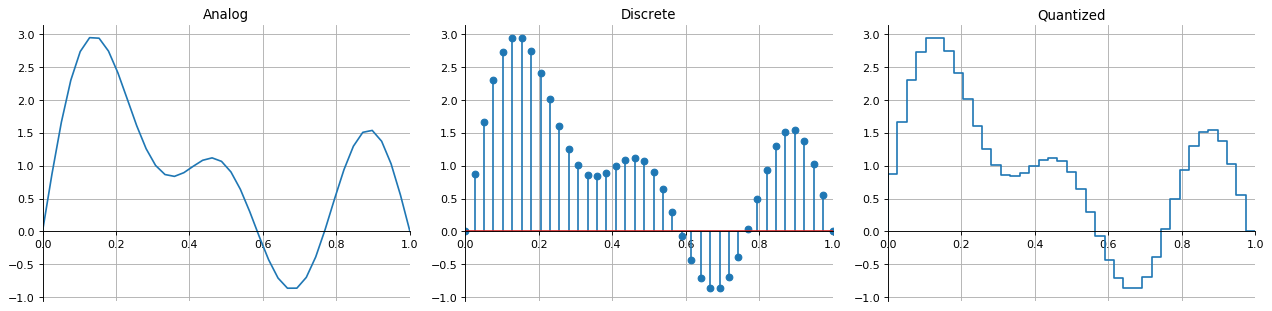

In [30]:
n = 40

# time vector
t = np.linspace(0, 1, n, endpoint=True)

# sine wave
x = np.sin(np.pi*t) + np.sin(2*np.pi*t) + np.sin(3*np.pi*t) + np.sin(5*np.pi*t)

# Select: plot, stem, bar
def plt_sel(s, *args, **kwargs):
    if s == 0:
        return plt.plot(*args)
    if s == 1:
        return plt.stem(*args, **kwargs)
    if s == 2:
        return plt.step(*args)

# Subplot titles
t_titles = ['Analog', 'Discrete', 'Quantized']

# Plot figures
fig = plt.figure(figsize=(16, 4), dpi=80)

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(t_titles[i]) 
    plt_sel(i, t, x, use_line_collection=True)
    plt.xlim([0, 1])
    plt.yticks(np.linspace(np.floor(np.min(x)), np.ceil(np.max(x)), 9))
    plt.grid(True)
    
    # change plot view
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position(('data',0))

plt.tight_layout()

If the **quantization** and **discretization** steps are chosen incorrectly, the signal will be distorted from analog to discrete. Let us show an example of an illiterate choice of a sampling step and a quantization step.

Set the sine graph. The signal length is n = 64 samples, which fit one period of the harmonic signal. We set the quantization step in such a way as to have a sample of d = 3, 5, 8, and 32 samples.

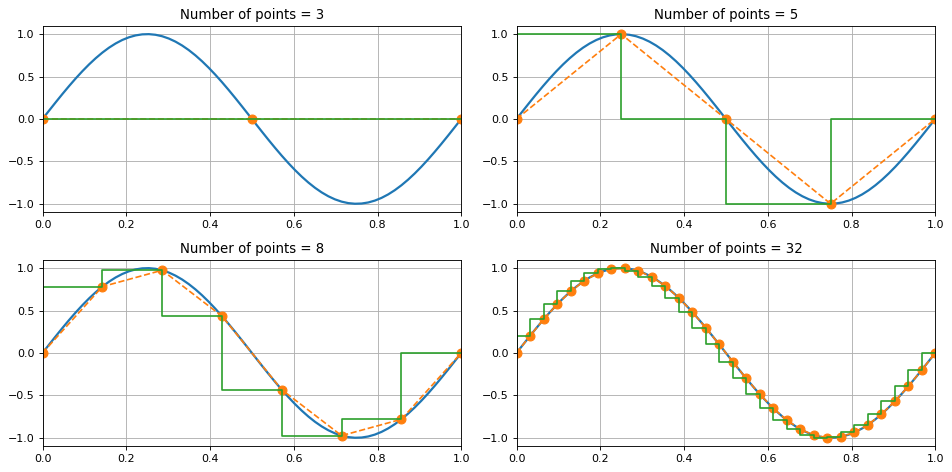

In [31]:
n = 64

# time vector
t = np.linspace(0, 1, n, endpoint=True)

# sine wave
ds = np.sin(2*np.pi*t)

# discrete step
step_lst = np.array([3, 5, 8, 32])

#plot figure
fig = plt.figure(figsize=(12, 6), dpi=80)

for i in range(4):
    tt = np.linspace(0, 1, step_lst[i], endpoint=True)
    
    plt.subplot(2, 2, i+1)
    plt.title('Number of points = {}'.format(step_lst[i]))
    plt.plot(t, ds, '-', linewidth=2.0) #solid line
    plt.plot(tt, np.sin(2*np.pi*tt), '--o', linewidth=1.5, markersize=8) #dashed with circular dot for points
    plt.step(tt, np.sin(2*np.pi*tt), linewidth=1.5) #step
    plt.grid()
    plt.xlim([0, 1])

plt.tight_layout()

As you can see, the worst form of the signal was obtained with a large value of the sampling step, that is, a large distance between adjacent samples of the digital signal. The smaller the distance between adjacent samples (the smaller the sampling step and the greater the number of sequence points), the better the discrete signal repeats the shape of the analog signal.

**Discrete sequences**

A discrete sequence is a mathematical model of a discrete signal, which is a lattice function: $x (nT) = x (n)$, where T is the sampling interval, n = 0, 1, 2, ..., N-1 are samples or samples.

An example of a finite discrete sequence $x(nT) = {2, 1, -2, 0, 2, 3, 1, 0}$. This sequence looks as shown in the figure:

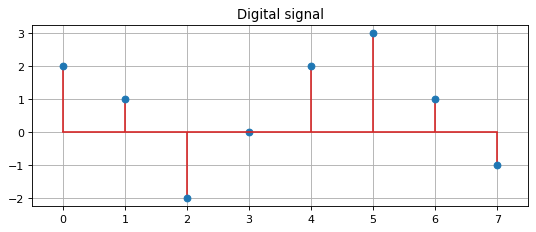

In [32]:
# Digital signal
xt = np.array([2, 1, -2, 0, 2, 3, 1, -1])
# Time vector
t = np.linspace(0, xt.size-1, xt.size, endpoint=True) 

# Plot figure
fig = plt.figure(figsize=(8, 3), dpi=80)
plt.title('Digital signal') 
plt.stem(t, xt, linefmt='C3', markerfmt='o', use_line_collection=True)
plt.xticks(t)
plt.xlim([np.min(t)-0.5, np.max(t)+0.5])
plt.grid(True)

## Delta function

A single impulse is the simplest discrete sequence. This is the *discrete δ-function of Dirac* $δ (nT)$, which is equal to unity for $n = 0$ and zero for all other values of n.

A discrete δ-function shifted in time by m clock intervals is written as follows: $δ (nT-mT)$.

## Single leap

A single jump or Heaviside function is another kind of simple and important discrete sequence. It assumes zero values ​​in the negative region of time and unit values ​​in the positive.

Mathematically, the unit jump function is written as:

$σ (nT) = δ (nT) + δ (nT - T) + δ (nT - 2T) + ...$

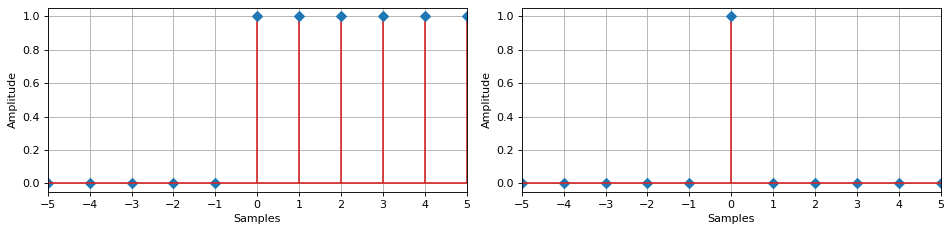

In [33]:
n = 6
# time vector
t = np.linspace(-n, n-1, 2*n)

# Delta function
xd = np.zeros(2*n)
xd[n] = 1

# Heaviside function
xh = np.heaviside(t, 1)

# Combine them together
xs = [xh, xd]

# Plot results
fig = plt.figure(figsize=(12, 3), dpi=80)
for i, sig in enumerate(xs):
    plt.subplot(1, 2, i+1)
    plt.stem(t, sig, linefmt='C3', markerfmt='D', use_line_collection=True)
    plt.ylabel('Amplitude')
    plt.xlabel('Samples')
    plt.xticks(t)
    plt.xlim([np.min(t)+1, np.max(t)])
    plt.grid(True)
plt.tight_layout()

The **discrete unit jump** σ (n) and the **discrete δ-function** δ (n) are related by the following relations:

$\delta(nT) = \sigma(nT) - \sigma(nT-T)$ , 

$\sigma(nT) = \sum_{k=0}^{+\infty}\delta(nT-kT)$ ,

An arbitrary discrete sequence can be written as a weighted sum of δ-functions:

$x(nT) = \sum_{k=0}^{+\infty}x(kT)\cdot\delta(nT-kT)$ ,

A sequence $x (nT)$ is called periodic if it satisfies the condition $x (nT) = x (nT + mNT)$,
Where
m and N are integers, m = 0, 1, 2, ..., NT  
NT is the period of a discrete sequence.



## Z conversion

Discrete sequences are very convenient to describe using the Z-form or Z-transforms.

The Z-transform is an analogue of the Laplace transform in discrete form. For a discrete sequence x (nT), a one-way Z-transform is defined by the following series:

$X(z) = Z |x(nT)| = \sum_{n=0}^{\infty}x(nT)z^{-n}$ ,

where $z = Re(z) + j \cdot Im(z)$ 

is a complex function, $X (z)$ is the Z-form of the sequence $x (nT)$.

The Z-transformation is connected with the Laplace transform through the formula:

$z = e^{sT}$

## Z transformation properties

- **Linearity**

If the sequence x (nT) can be represented as a linear combination 

$ x(nT) = a \cdot x_1(nT) + b \cdot x_2(nT) $,  

то $ X(z) = a \cdot X_1(z) + b\cdot X_2(z) $. 

In other words, the Z-transform of the sum of the signals is equal to the sum of the z-images of these signals.

    
- **Delay (time shift)**

$Z[x(nT-mT)] = z^{-m} \cdot X(z)$. 

Input delay by m introduces an additional factor $𝑧 − 𝑚$.

- **Convolution**

For the sequence $y (nT)$, the convolution of two sequences is equal to:

$y(nT) = \sum_{m=0}^{\infty}x_{1}(mT) \cdot x_{2}(nT-mT) $.  

or  

$y(nT) = \sum_{m=0}^{\infty}x_{2}(mT) \cdot x_{1}(nT-mT) $. 


And for the Z-form:

$Y(z) = X_{1}(z) \cdot X_{2}(z) $.  

Z-transformation of the convolution of signals is equal to the product of their Z-images.

If the input signal $x (nT)$ is represented as a weighted sum of δ-functions, then the Z-form takes the form

$X(z) = \sum_{k=0}^{\infty}x(kT) \cdot z^{-k}$.  

## # Examples

  **Write the Z-form for the sequence x (nT) = {1,2,3,4,5}**

$X(z) = 1 + 2z^{-1} + 3z^{-2} + 4z^{-3} + 5z^{-4}$.  

   **Write the Z-form for the sequence as a unit jump σ (nT).**

$X(z) = 1 + z^{-1} + z^{-2} + z^{-3} + z^{-4} + ... = \frac{1}{(1-z^{-1})}$.  

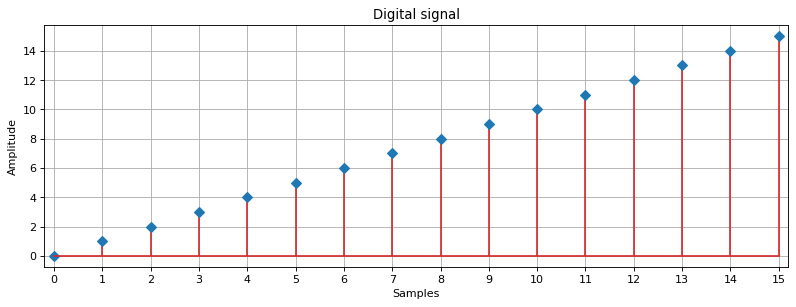

In [34]:
# Digital signal
xt = np.arange(16)

# Plot figure
fig = plt.figure(figsize=(12, 4), dpi=80)
plt.title('Digital signal') 
plt.stem(xt, linefmt='C3', markerfmt='D', use_line_collection=True)
plt.ylabel('Amplitude')
plt.xlabel('Samples')
plt.xticks(xt)
plt.xlim([np.min(xt)-0.2, np.max(xt)+0.2])
plt.grid(True)